<a href="https://colab.research.google.com/github/WillLeandro/projeto_insigth_House_rocket/blob/main/Projeto_house_rokt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1 - Bibliotecas**

In [257]:
import pandas as pd
import numpy as np
import seaborn as sns

## **2 - Dados**

**2.1 - Importação dos dados**

In [138]:
df = pd. read_csv('/content/drive/MyDrive/kc_house_data.csv')

**2.2 - Dimensões e tipos das varáveis**

In [139]:
# dimensão
print(f'Total de linhas: {df.shape[0]}\n Total de Colunas: {df.shape[1]}\n\n')

# tipo dos dados
df.dtypes

Total de linhas: 21613
 Total de Colunas: 21




id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

**2.3 - Transformando os dados**

In [140]:
# transformando coluna date, de object para datetime
df['date'] = pd.to_datetime(df['date'])


**2.4 - Limpeza dos dados**

In [141]:
#  IDs duplicados
print(  'Total de IDs {}'.format( len( df['id'].unique().tolist() ) ) )

# Ordenando e verificando repetição dos IDs
df.sort_values('id').head()

Total de IDs 21436


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2497,1000102,2015-04-22,300000.00,6,3.00,2400,9373,2.00,0,0,3,7,2400,0,1991,0,98002,47.33,-122.21,2060,7316
2496,1000102,2014-09-16,280000.00,6,3.00,2400,9373,2.00,0,0,3,7,2400,0,1991,0,98002,47.33,-122.21,2060,7316
6735,1200019,2014-05-08,647500.00,4,1.75,2060,26036,1.00,0,0,4,8,1160,900,1947,0,98166,47.44,-122.35,2590,21891
8411,1200021,2014-08-11,400000.00,3,1.00,1460,43000,1.00,0,0,3,7,1460,0,1952,0,98166,47.44,-122.35,2250,20023
8809,2800031,2015-04-01,235000.00,3,1.00,1430,7599,1.50,0,0,4,6,1010,420,1930,0,98168,47.48,-122.27,1290,10320


In [142]:
# retirando IDs duplicados
df = df.drop_duplicates( subset = ['id'], keep = 'last' )

# Ordenando e verificando a reirada dos IDs duplicados
df.sort_values('id').head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2497,1000102,2015-04-22,300000.00,6,3.00,2400,9373,2.00,0,0,3,7,2400,0,1991,0,98002,47.33,-122.21,2060,7316
6735,1200019,2014-05-08,647500.00,4,1.75,2060,26036,1.00,0,0,4,8,1160,900,1947,0,98166,47.44,-122.35,2590,21891
8411,1200021,2014-08-11,400000.00,3,1.00,1460,43000,1.00,0,0,3,7,1460,0,1952,0,98166,47.44,-122.35,2250,20023
8809,2800031,2015-04-01,235000.00,3,1.00,1430,7599,1.50,0,0,4,6,1010,420,1930,0,98168,47.48,-122.27,1290,10320
3557,3600057,2015-03-19,402500.00,4,2.00,1650,3504,1.00,0,0,3,7,760,890,1951,2013,98144,47.58,-122.29,1480,3504


In [143]:
# identificando outiliers nos atributos

uni = df[['bedrooms','bathrooms','floors','waterfront','view','condition','grade']]

for i in uni:
  print(f'Atributo: {i}, - {df[i].unique().tolist()}')

Atributo: bedrooms, - [3, 2, 4, 5, 1, 6, 7, 0, 8, 9, 11, 10, 33]
Atributo: bathrooms, - [1.0, 2.25, 3.0, 2.0, 4.5, 1.5, 2.5, 1.75, 2.75, 3.25, 4.0, 3.5, 0.75, 4.75, 5.0, 4.25, 3.75, 0.0, 1.25, 5.25, 6.0, 0.5, 5.5, 6.75, 5.75, 8.0, 7.5, 7.75, 6.25, 6.5]
Atributo: floors, - [1.0, 2.0, 1.5, 3.0, 2.5, 3.5]
Atributo: waterfront, - [0, 1]
Atributo: view, - [0, 3, 4, 2, 1]
Atributo: condition, - [3, 5, 4, 1, 2]
Atributo: grade, - [7, 6, 8, 11, 9, 5, 10, 12, 4, 3, 13, 1]


In [144]:
# removendo um possível erro de digitação na coluna 'bedrooms'
df.drop(df.loc[ df['bedrooms'] == 33 ].index, inplace=True )

**2.3 - criando novas Features** 

In [313]:
# criando colunas mês e ano
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# criando coluna 'porão
df['basement'] = df['sqft_basement'].apply(lambda x: 'yes ' if x != 0 else 'no')

# criando coluna renovated
df['renovated'] = df['yr_renovated'].apply( lambda x: 'yes' if x > 0 else 'no')

# criando coluna contru
df['construction'] = df['yr_built'].apply( lambda x: '> 1955' if x >1955 else '< 1955' )

# criando a coluna season
df['season'] = df['month'].apply( lambda x: 'summer' if (x > 5 ) & (x < 8)  else 
                                            'spring' if (x > 2) & (x < 5)  else
                                            'autumn' if (x > 8 ) & (x < 12 )  else 'winter' )

                                        

In [314]:
# checando valores NA
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year             0
month            0
basement         0
renovated        0
contruction      0
banheiro         0
season           0
construction     0
dtype: int64

## **3 - Exploração dos dados**

In [318]:
df2 = df.copy()

**3.1 - Estatísica descritiva**

        atributos     maximo   minimo     media   mediana       std
0           price 7700000.00 75000.00 541645.37 450000.00 367314.32
1        bedrooms      11.00     0.00      3.37      3.00      0.91
2       bathrooms       8.00     0.00      2.12      2.25      0.77
3     sqft_living   13540.00   290.00   2082.73   1920.00    919.14
4        sqft_lot 1651359.00   520.00  15136.06   7614.00  41538.57
5          floors       3.50     1.00      1.50      1.50      0.54
6      waterfront       1.00     0.00      0.01      0.00      0.09
7            view       4.00     0.00      0.24      0.00      0.77
8       condition       5.00     1.00      3.41      3.00      0.65
9           grade      13.00     1.00      7.66      7.00      1.17
10     sqft_above    9410.00   290.00   1791.00   1560.00    829.01
11  sqft_basement    4820.00     0.00    291.73      0.00    442.78
12       yr_built    2015.00  1900.00   1971.10   1975.00     29.38
13   yr_renovated    2015.00     0.00     84.73 

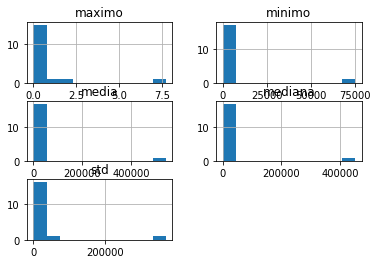

In [319]:
num_atributos = df2.select_dtypes( include= ['int64','float64'] )
num_atributos = num_atributos.iloc[: , 1:]
num_atributos = num_atributos.drop(columns=['zipcode','lat','long'])

# tendencia central: média e mediana
media = pd.DataFrame( num_atributos.apply( np.mean, axis=0 ) )
mediana = pd.DataFrame( num_atributos.apply( np.median, axis=0 ) )

# tendencia descritiva: devio padrão, minimo e maximo
std = pd.DataFrame( num_atributos.apply( np.std, axis=0 ) )
min_ = pd.DataFrame( num_atributos.apply( np.min, axis=0 ) )
max_ = pd.DataFrame( num_atributos.apply( np.max, axis=0 ) )

atri = pd.concat(( max_, min_, media, mediana, std), axis=1).reset_index()
atri.columns = ('atributos','maximo', 'minimo', 'media','mediana','std')
print(atri)
atri.hist();

**Correlção**

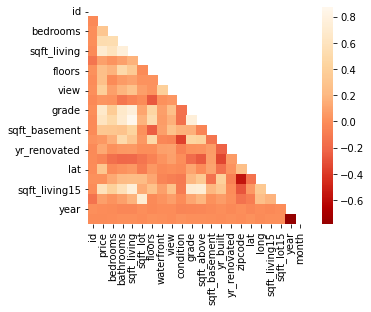

In [320]:
matriz = np.triu( df2.corr() )

sns.heatmap(df2.corr(), cmap = 'OrRd_r', square = True, annot = False, center = 0, mask = matriz)

## **5 - Questão de negócio**
  <br>


 **1 - Quais imóveis a House Rocket deveria comprar e por qual preço de compra?**

In [321]:
# calculando a mediana do preço por zipcode
a = df2[['zipcode','price']].groupby('price').median().reset_index()

In [322]:
# adicionando o calculo da mediana ao dataframe df2
df3 = pd.merge(a, df2, on = 'zipcode', how = 'inner')

# renomeando as colunas price_x para price_median e price_y para price
df3 = df3.rename(columns= {'price_x': 'price_median', 'price_y': 'price'})

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:1208: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


In [154]:
# Usando o método 'for' percebi que iria demorar muito para que a condição percorrece todas as linhas do df2, logo optei usar lambda para ter uma performace maior
"""
for i, linha in df3.iterrows():
  if (linha['price_median'] >= linha['price'] ) & (linha['dondition'] < 3 ):
    df3.loc[i,'pay'] = 'yes'
  else:
    df3.loc[i,'pay'] = 'no'

"""



"\nfor i, linha in df3.iterrows():\n  if (linha['price_median'] >= linha['price'] ) & (linha['dondition'] < 3 ):\n    df3.loc[i,'pay'] = 'yes'\n  else:\n    df3.loc[i,'pay'] = 'no'\n\n"

In [323]:
# classificando os imóveis em 'yes': comprar e 'no': não comprar
df3['pay'] = df3.apply(lambda x:'yes' if (x['price_median'] >= x['price']) & (x['condition'] < 3) else 'no', axis=1)

In [324]:
# Casas para se comprar
comprar = df3[ df3['pay'] == 'yes' ]
comprar[['id','price','pay']]

# Percebi que o resultado apareceu 'IDs' duplicados, logo irei remover os IDs duplicados na próximal linha de códgigos

,id,price,pay
4173,620079042,370000.00,yes
4407,620079042,370000.00,yes
4640,40000362,78000.00,yes
4904,40000362,78000.00,yes
4915,3028200080,81000.00,yes
...,...,...,...
1219630,9808700025,1500000.00,yes
1219931,2425700022,425000.00,yes
1219945,9808700025,1500000.00,yes
1220246,2425700022,425000.00,yes


In [325]:
# Retirandos IDs duplicados
df3 = df3.drop_duplicates(subset = ['id'], keep = 'last')

# Casas para serem compradas
comprar = df3[ df3['pay'] == 'yes' ]
comprar = comprar[['id','price','pay']]
print(f'Total de {comprar.shape[0]} imóveis para comprar')
comprar

Total de 192 imóveis para comprar


,id,price,pay
4407,620079042,370000.00,yes
11072,1623049041,82500.00,yes
11165,1446401540,243000.00,yes
11187,1446800181,264950.00,yes
11195,985001275,250000.00,yes
...,...,...,...
1192515,2128000160,429000.00,yes
1192637,3885808035,619500.00,yes
1192782,1233100351,305000.00,yes
1220246,2425700022,425000.00,yes


In [326]:
# Salvando os imoveis para se comprar em um arquivo csv

comprar.to_csv(r'/content/drive/MyDrive/Comunidade DS/Python do Zero ao DS/sale.csv',index=False)

  **2 - Uma vez o imóvel em posse da empresa, qual o melhor momento para vendê-lo e qual seria o preço da venda?**

In [189]:
df4 = df3.copy()

In [204]:
# Filtrando os imóveis com classificação positiva de compra
df4 = df4[ df4['pay'] == 'yes' ]

# Fazendo o calculo do preço mediano por season
df5 = df4[['season','zipcode','price']].groupby(['zipcode','season']).median().reset_index()

# Renomeando as colunas price para 'price_media_season e season para 'season_median
df5 = df5.rename(columns={'price': 'price_median_season','seasson': 'season_median'})

# Adicionando as duas novas colunas 'price_median_season' e 'season_median' a df6
df6 = pd.merge(df4, df5, on = 'zipcode', how = 'inner')



In [206]:
# calculando o preço de venda dos imóveis

df6['sale'] = df6.apply( lambda x: x['price'] * 1.1 if x['price_median_season'] > x['price'] else x['price'] * 1.3, axis=1 )

In [330]:
# Preços do imóveis a serem vendidos
df6 = df6.rename(columns={'season_y': 'season'} )
df6['profit'] = df6['sale'] - df6['price']
venda = df6[['id','season','price','sale','profit']]

venda.to_csv(r'/content/drive/MyDrive/Comunidade DS/Python do Zero ao DS/sale.csv', index=False)

## **5 - Lucro do negócio**

In [224]:
df6['profit'] = df6['sale'] - df6['price']
df6['profit'].sum()
print('Total de ${} de lucro'.format( df6['profit'].sum() ) )

Total de $36891031.8 de lucro


## **6 -  hipóteses e validação das hipóteses**

**H1 - Imóveis com vista para a água são em média 30% mais caros**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


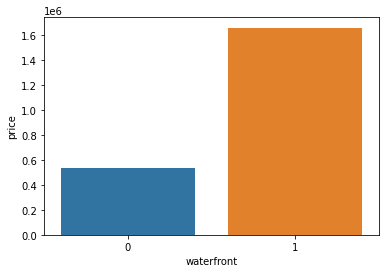

In [301]:
h1 = df[['price','waterfront']].groupby('waterfront').mean().reset_index()
sns.barplot(h1['waterfront'], h1['price']);

**H2 - Imóveis com data de construção menor que 1955 são em média 50% mais baratos**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


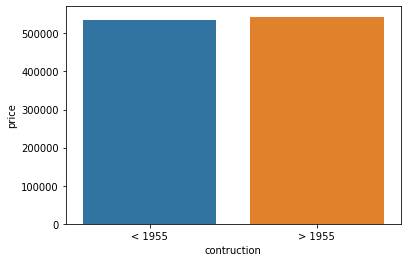

In [300]:
h2 = df[['price','contruction']].groupby('contruction').mean().reset_index()
sns.barplot(h2['contruction'], h2['price']);

**H3 - Imóveis sem porão com maior área total são 40% maiores**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


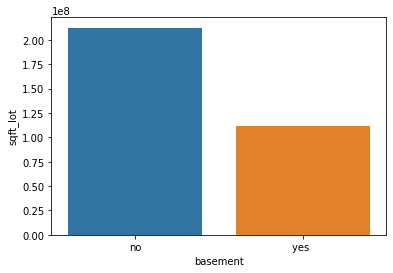

In [299]:
h3 = df[['basement','sqft_lot','price']].groupby('basement').sum().reset_index()
sns.barplot(h3['basement'], h3['sqft_lot']);

**H4 - Imóveis que nunca foram reformados são em média 20% mais baratos**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


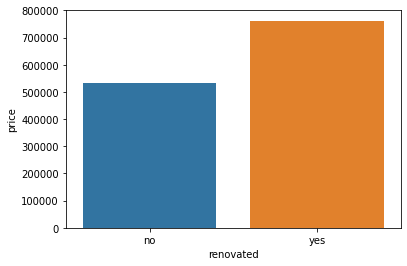

In [306]:
h4 = df[['renovated','price']].groupby('renovated').mean().reset_index()
sns.barplot(h4['renovated'], h4['price']);

**H5 - Imóveis em más condições, mas com boa vista são 10% mais caros**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


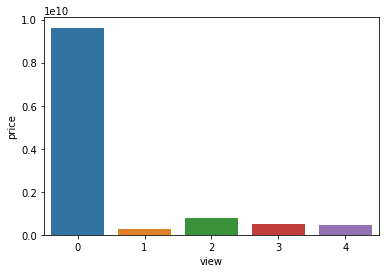

In [312]:
h5 = df[df['condition'] == 1]

h5 = df[['view','price']].groupby('view').sum().reset_index()
sns.barplot(h5['view'], h5['price']);